In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import pickle 

In [2]:
# get lake data
with open(f'saves/lake_data_dicts.pkl', 'rb') as f:
    data = pickle.load(f)

In [3]:
lakes = list(data.keys())

low = 50
high = 90

wls = []
X_ids = []
wls_t = []
wls_long = []
X_ids_long = []
wls_t_long = []

for lake in lakes:
    lake_dict = data[lake]
    for i,df in enumerate(lake_dict['wlts']):
        wl_l = list(df.wl)
        t = list(df.time)
        if len(wl_l) >= low:
            wls.append(wl_l[-low:])
            wls_t.append(t[-low:])
            X_ids.append([lake, i])
        if len(wl_l) >= high:
            wls_long.append(wl_l[-high:])
            wls_t_long.append(t[-high:])
            X_ids_long.append([lake, i])
X = torch.tensor(wls)
wls_t = torch.tensor(wls_t)

X_long = torch.tensor(wls_long)
wls_t_long = torch.tensor(wls_t_long)

In [4]:
xs = np.arange(0,low,1)
x_long = np.arange(0,high,1)

In [5]:
len(wls_t)

8370

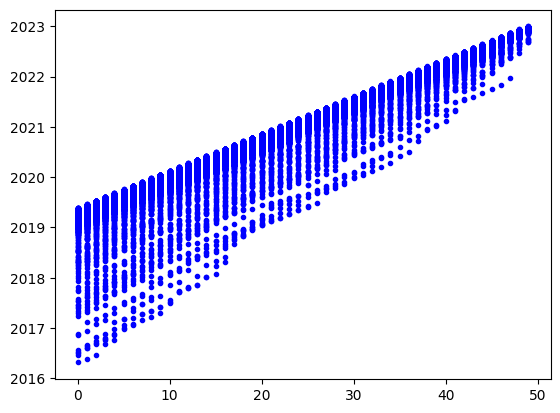

In [6]:
for i in range(1000):
    plt.scatter(x=xs, y=wls_t[i], color='b', marker='.')
plt.show()

In [7]:
len(wls_t_long)

2609

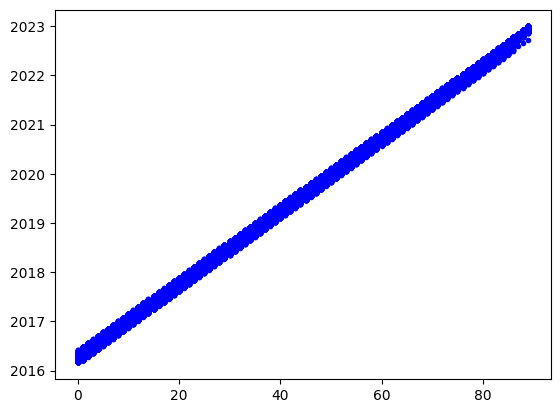

In [8]:
for i in range(len(wls_t_long)):
    plt.scatter(x=x_long, y=wls_t_long[i], color='b', marker='.')
plt.show()

In [66]:
pick = 'long'
y = []
x = []
if pick == 'short':
    for i in range(wls_t.shape[0]):
            y.extend(list(wls_t[i]))
            x.extend(list(xs))
if pick == 'long':
    for i in range(wls_t_long.shape[0]):
            y.extend(list(wls_t_long[i]))
            x.extend(list(x_long))
y = 10*np.asarray(y)

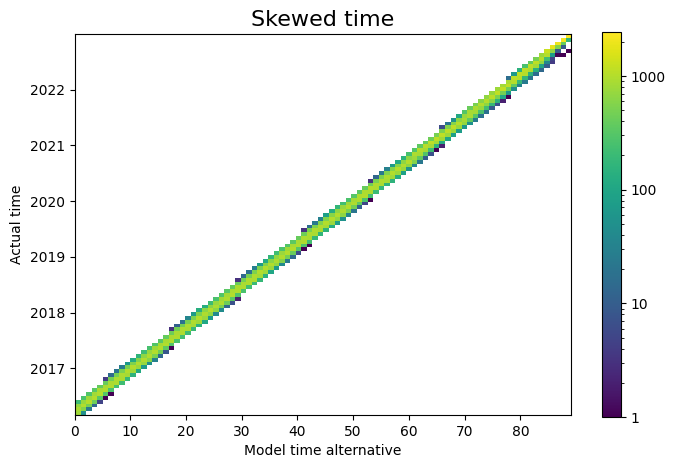

In [67]:
from matplotlib.colors import LogNorm
#y = wltss['all']['all_wltsv']
#x = 1000*np.asarray(wltss['all']['all_wltsv_t'])
#y = 10*np.asarray(y)
if pick == 'short':
    bins = [low,100]
if pick == 'long':
    bins = [high,100]
heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
#heatmap[heatmap==0] = 0.1
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

fig, ax = plt.subplots(1, 1,figsize=(8, 5))
im = ax.imshow(heatmap.T, extent=extent, origin='lower',cmap='viridis',norm=LogNorm())
ax.set_xlabel('Model time alternative')
ax.set_ylabel('Actual time')
ax.set_title("Skewed time", fontsize=16)
ax.set_yticks([20170, 20180, 20190, 20200, 20210, 20220])
ax.set_yticklabels([2017, 2018, 2019, 2020, 2021, 2022])
cbar = plt.colorbar(im,ticks=[1, 10,100,1000])
cbar.ax.set_yticklabels([ '1', '10', '100','1000'])
plt.savefig(f"plots/skewed_time_{pick}.png", bbox_inches='tight', facecolor ="w", dpi=300)
plt.show()

In [68]:
pick = 'short'
y = []
x = []
if pick == 'short':
    for i in range(wls_t.shape[0]):
            y.extend(list(wls_t[i]))
            x.extend(list(xs))
if pick == 'long':
    for i in range(wls_t_long.shape[0]):
            y.extend(list(wls_t_long[i]))
            x.extend(list(x_long))
y = 10*np.asarray(y)

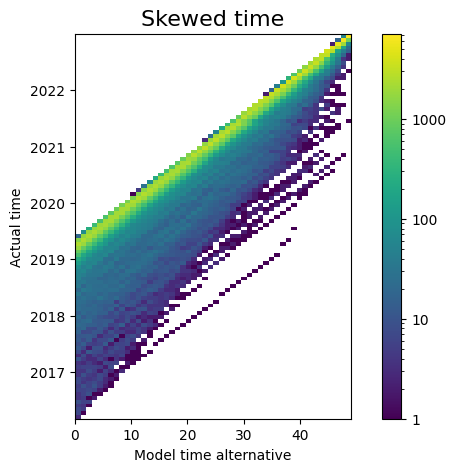

In [69]:
from matplotlib.colors import LogNorm
#y = wltss['all']['all_wltsv']
#x = 1000*np.asarray(wltss['all']['all_wltsv_t'])
#y = 10*np.asarray(y)
if pick == 'short':
    bins = [low,100]
if pick == 'long':
    bins = [high,100]
heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
#heatmap[heatmap==0] = 0.1
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

fig, ax = plt.subplots(1, 1,figsize=(8, 5))
im = ax.imshow(heatmap.T, extent=extent, origin='lower',cmap='viridis',norm=LogNorm())
ax.set_xlabel('Model time alternative')
ax.set_ylabel('Actual time')
ax.set_title("Skewed time", fontsize=16)
ax.set_yticks([20170, 20180, 20190, 20200, 20210, 20220])
ax.set_yticklabels([2017, 2018, 2019, 2020, 2021, 2022])
cbar = plt.colorbar(im,ticks=[1, 10,100,1000])
cbar.ax.set_yticklabels([ '1', '10', '100','1000'])
plt.savefig(f"plots/skewed_time_{pick}.png", bbox_inches='tight', facecolor ="w", dpi=300)
plt.show()